In [127]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [163]:
AO_length = 0.125
CO_length = 0.378 # når EO=RO=C0 the ball is transitioning from the launcher to free fall
DO_lenght = 0.440

k = 3.23 * 1000
# AE is a spring
AE_L0 = 0.280 # resting lengt of the spring

DE = np.arange(0,11)*0.0235 + 0.039 # 11 settings from 0.039 to 0.274 speed setting
theta_deg_initial = [5.8, 9.7, 13.7, 17.7, 21.8, 26, 30.2] # height adjustment
theta_rad_initial = np.deg2rad(theta_deg_initial)

height_setting = 3 #Default for all but one of the baseball settings.
theta_deg_end = 90
theta_rad_end = np.deg2rad(theta_deg_end)

print(DE)

[0.039  0.0625 0.086  0.1095 0.133  0.1565 0.18   0.2035 0.227  0.2505
 0.274 ]


In [153]:
theta_deg = np.arange(0,360,0.1)
theta_rad = theta_deg*2*pi/360

In [155]:
AO = np.column_stack((-0.125 * np.cos(theta_rad), -0.125 * np.sin(theta_rad), np.zeros(3600)))
EO = np.array([0.274, -0.440, 0])
EA = EO - AO

EA_length = np.linalg.norm(EA, axis=1)
EA_angle_rad = np.arctan2(EA[:, 1], EA[:, 0])
EA_angle_deg = np.rad2deg(EA_angle_rad)
CAangE_rad = theta_rad - EA_angle_rad
CAangE_deg = np.rad2deg(CAangE_rad)

x_length = EA_length - AE_L0
fjærkraft = k*x_length
fjærkraft_vinkelrett_AC = fjærkraft*np.sin(CAangE_rad)
fjærkraft_radielt_AC = fjærkraft*np.cos(CAangE_rad)


M_om_O_fra_fjærkraft = fjærkraft_vinkelrett_AC*AO_length
print(EA_length[0])
print(theta_deg[1])

0.5939705379898905
0.1


In [159]:
np.mean(fjærkraft_vinkelrett_AC[177:900])

622.4202203851893

In [169]:
for i, DE_lenght in enumerate(DE):
    AO = np.column_stack((-0.125 * np.cos(theta_rad), -0.125 * np.sin(theta_rad), np.zeros(3600)))
    EO = np.array([DE_lenght, -0.440, 0])
    EA = EO - AO
    
    EA_length = np.linalg.norm(EA, axis=1)
    EA_angle_rad = np.arctan2(EA[:, 1], EA[:, 0])
    EA_angle_deg = np.rad2deg(EA_angle_rad)
    CAangE_rad = theta_rad - EA_angle_rad
    CAangE_deg = np.rad2deg(CAangE_rad)
    
    x_length = EA_length - AE_L0
    fjærkraft = k*x_length
    fjærkraft_vinkelrett_AC = fjærkraft*np.sin(CAangE_rad)
    fjærkraft_radielt_AC = fjærkraft*np.cos(CAangE_rad)
    
    
    M_om_O_fra_fjærkraft = fjærkraft_vinkelrett_AC*AO_length

    print(np.mean(fjærkraft_vinkelrett_AC[177:900]))

222.43950666212183
248.75243825183077
278.5797137136697
311.8551172325805
348.42007299139027
388.0490174616337
430.474378894393
475.408508987135
522.5611737657069
571.6522784161646
622.420220385189


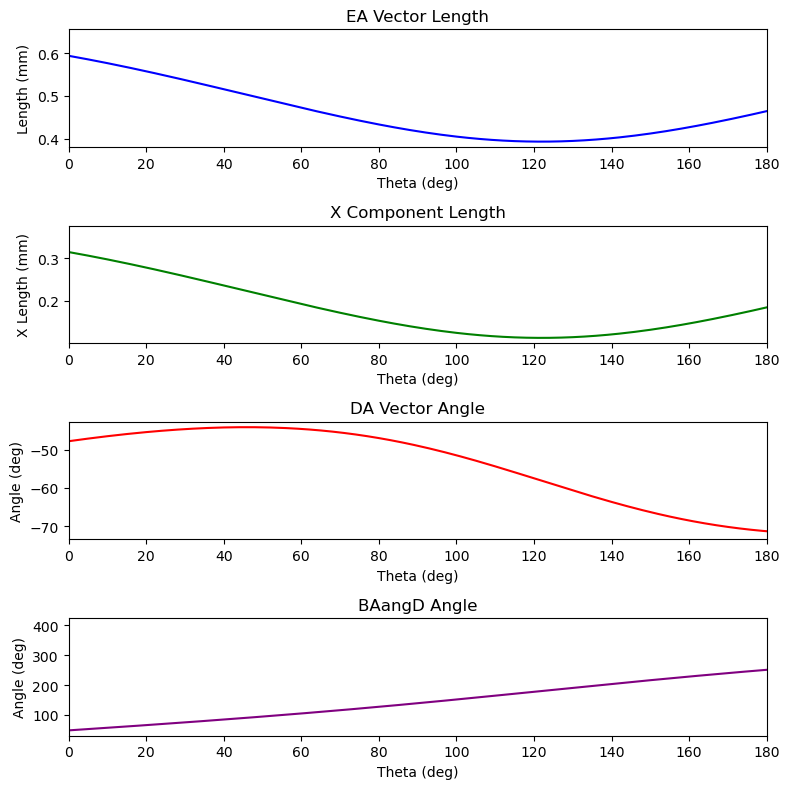

In [135]:
maxTheta = 180
fig, ax = plt.subplots(4, figsize=(8, 8))

# First subplot: DA Length
ax[0].plot(EA_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('EA Vector Length')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('Length (mm)')

# Second subplot: x_length (assuming x_length is defined)
ax[1].plot(x_length, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('X Component Length')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('X Length (mm)')

# Third subplot: DA Angle in degrees
ax[2].plot(EA_angle_deg, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('DA Vector Angle')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Angle (deg)')

# Fourth subplot: BAangD_deg (assuming BAangD_deg is defined)
ax[3].plot(CAangE_deg, color='purple')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('BAangD Angle')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Angle (deg)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


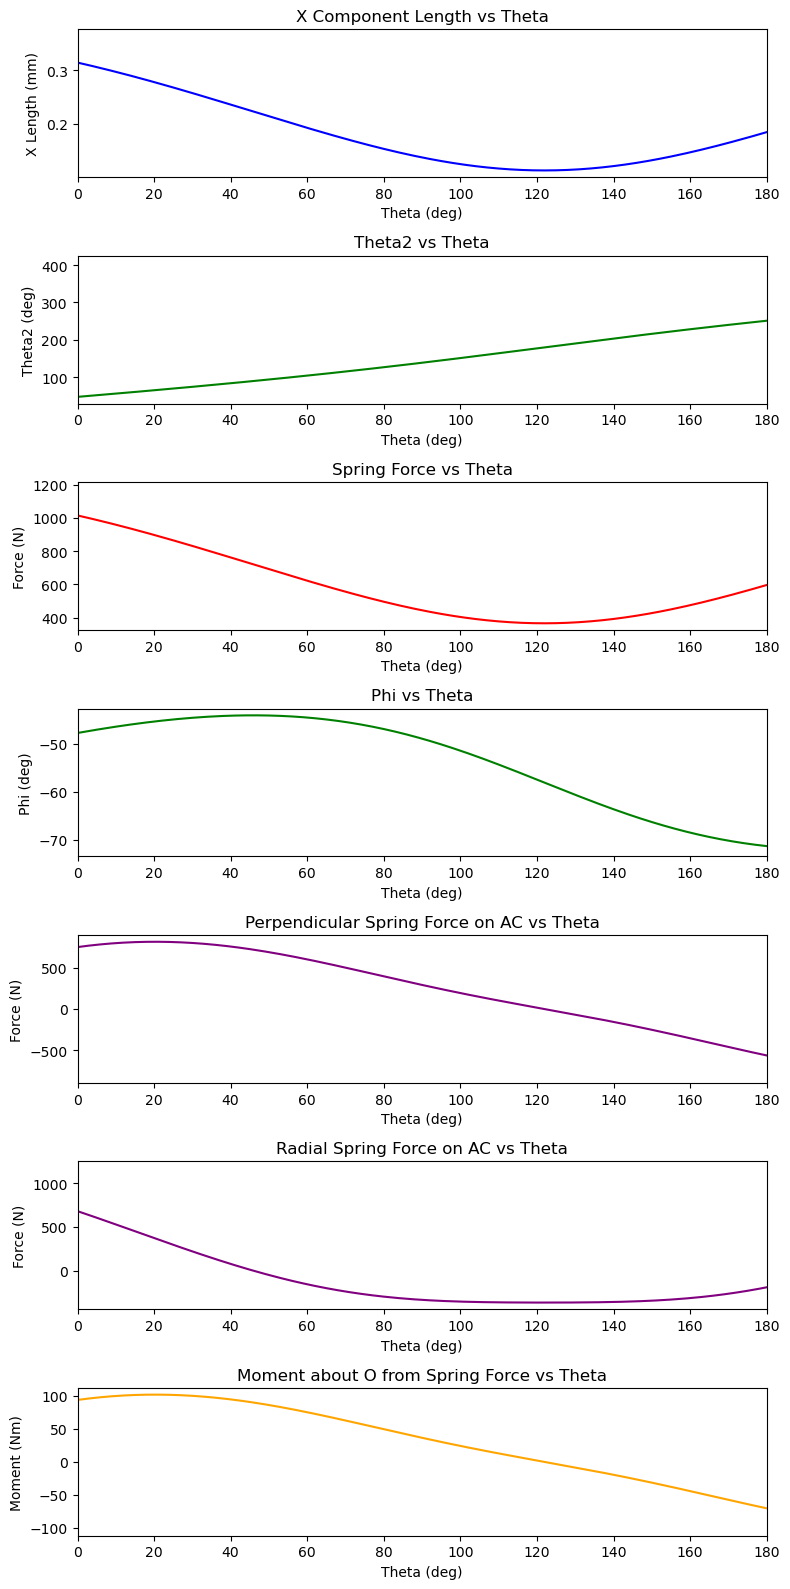

In [137]:
maxTheta = 180
fig, ax = plt.subplots(7, figsize=(8, 16))

# First subplot: X Component Length
ax[0].plot(x_length, color='blue')
ax[0].set_xlim(0, maxTheta)
ax[0].set_title('X Component Length vs Theta')
ax[0].set_xlabel('Theta (deg)')
ax[0].set_ylabel('X Length (mm)')

# Second subplot: BA Angle in degrees
ax[1].plot(CAangE_deg, color='green')
ax[1].set_xlim(0, maxTheta)
ax[1].set_title('Theta2 vs Theta')
ax[1].set_xlabel('Theta (deg)')
ax[1].set_ylabel('Theta2 (deg)')

# Third subplot: Spring Force (fjærkraft)
ax[2].plot(fjærkraft, color='red')
ax[2].set_xlim(0, maxTheta)
ax[2].set_title('Spring Force vs Theta')
ax[2].set_xlabel('Theta (deg)')
ax[2].set_ylabel('Force (N)')

# Second subplot: BA Angle in degrees
ax[3].plot(EA_angle_deg, color='green')
ax[3].set_xlim(0, maxTheta)
ax[3].set_title('Phi vs Theta')
ax[3].set_xlabel('Theta (deg)')
ax[3].set_ylabel('Phi (deg)')

# Fourth subplot: Perpendicular Spring Force on AB (fjærkraft_vinkelrett_AB)
ax[4].plot(fjærkraft_vinkelrett_AC, color='purple')
ax[4].set_xlim(0, maxTheta)
ax[4].set_title('Perpendicular Spring Force on AC vs Theta')
ax[4].set_xlabel('Theta (deg)')
ax[4].set_ylabel('Force (N)')

# Fourth subplot: Perpendicular Spring Force on AB (fjærkraft_vinkelrett_AB)
ax[5].plot(fjærkraft_radielt_AC, color='purple')
ax[5].set_xlim(0, maxTheta)
ax[5].set_title('Radial Spring Force on AC vs Theta')
ax[5].set_xlabel('Theta (deg)')
ax[5].set_ylabel('Force (N)')

# Fifth subplot: Moment about O from Spring Force (M_om_O_fra_fjærkraft/1000)
ax[6].plot(M_om_O_fra_fjærkraft, color='orange')
ax[6].set_xlim(0, maxTheta)
ax[6].set_title('Moment about O from Spring Force vs Theta')
ax[6].set_xlabel('Theta (deg)')
ax[6].set_ylabel('Moment (Nm)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()